In [2]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}



plt.rc('font', **font) 

G0 = nx.read_weighted_edgelist("/home/achiso/MATH27/4932.protein.links.v12.0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!
G0 

#G_1 = nx.read_weighted_edgelist("/home/achiso/MATH27/Sec.txt" , comments="#" , nodetype=str) 
#G_1 

In [3]:
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

print("( O v O)b") 

( O v O)b


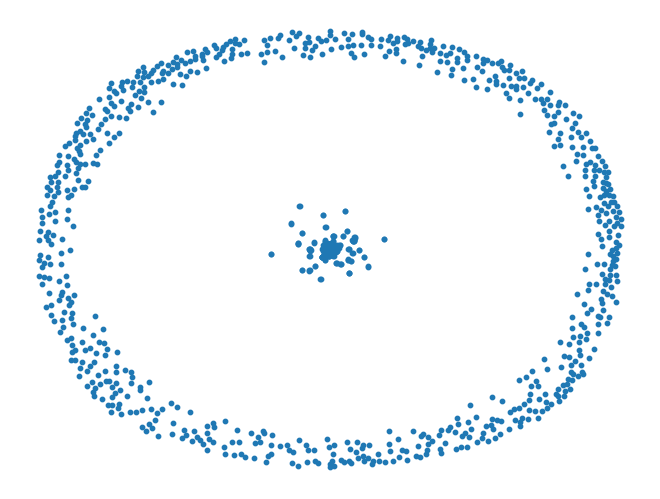

In [5]:
nx.draw(G0,node_size = 10)

In [9]:

print(G0.number_of_nodes())
largest_cc = max(nx.connected_components(G0) , key=len) 
Gc = G0.subgraph(largest_cc) 
print(Gc.number_of_nodes()) 

6538
5697


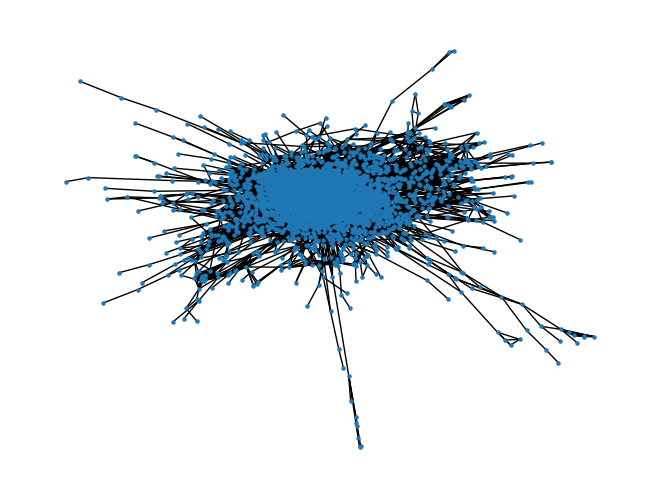

In [10]:
nx.draw(Gc , node_size = 5) 

In [12]:
commus = nx.community.label_propagation_communities(Gc) 
print(type(new_out))
print(len(new_out))

<class 'dict_values'>
334


In [13]:

modularity_v1 = nx.community.modularity(Gc , new_out) 

print("modularity :" , modularity_v1) 


modularity : 0.5368602914379882


In [241]:
G = nx.Graph(Gc) 
for i in commus : 
    if len(i) < 11 : 
        for ii in i : 
            G.remove_node(ii) 
print("|G0| :" , G0.number_of_nodes()) 
print("|Gc| :" , Gc.number_of_nodes()) 
print("|G| :" , G.number_of_nodes()) 
newer_commus = nx.community.label_propagation_communities(G) 
modularity_v2 = nx.community.modularity(G , newer_commus) 

print("modularity :" , modularity_v2) 

|G0| : 6538
|Gc| : 5697
|G| : 4637
modularity : 0.544733466438132


In [202]:
tmp_maxi = 0 
for i in newer_commus : 
    if len(i) > tmp_maxi : 
        tmp_maxi = len(i) 
sizes = (tmp_maxi+1)*[0] 
print("max commus size:" , tmp_maxi) 


max commus size: 1002


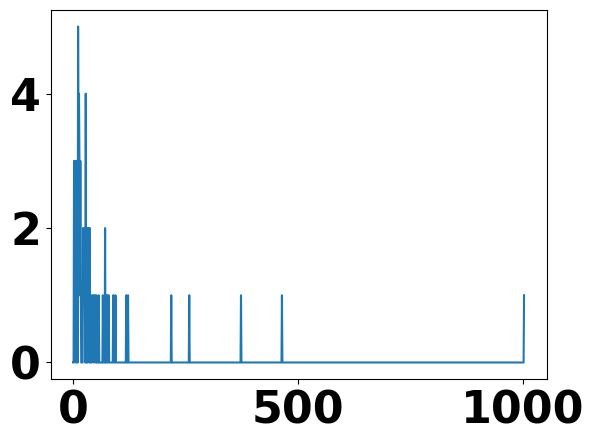

In [203]:

xAxis = [] 
for i in newer_commus : 
    sizes[len(i)] += 1 

for i in range(tmp_maxi+1) : 
    xAxis.append(i) 

plt.plot(xAxis , sizes) 


In [204]:

ccolours_list = ["#00b4d9" , "#4bf542" , "#ff0829" , "#1500ff" , "#f7f302" , "#fa7107" , "#f505cd" , "#9d05f5" , "#fcd305"] 

tmp_c = 0 
tmp_rcommu = 0 



for i in newer_commus : 
    for ii in i : 
        if ii == "4932.YMR190C" : 
            print(len(i) , "@" , tmp_rcommu) 
#            print(i) 
            break 
    tmp_rcommu += 1 
tmp_c = 0 
raw_tar_commu = 0 
for i in newer_commus : 
    if tmp_c == 15 :  
        raw_tar_commu = i 
        break 
    tmp_c += 1 


464 @ 15


In [205]:
tar_commu = nx.subgraph(G , raw_tar_commu) 

tar_degCentra = nx.degree_centrality(tar_commu) 
print(len(tar_degCentra)) 

tar_btweenCentra = nx.betweenness_centrality(tar_commu) 
print(len(tar_btweenCentra)) 



464
464


In [206]:
#print(tar_degCentra["4932.YMR190C"]) 
print("//////////// BTWEEN CENTRA /////////////\n[ 4932.YMR190C |" + str(tar_btweenCentra["4932.YMR190C"]) + "]") 

tmp_c = 0 
for i in tar_btweenCentra : 
    if tar_btweenCentra[i] > tar_btweenCentra["4932.YMR190C"] : 
        tmp_c += 1 
        print(i , "-->" , tar_btweenCentra[i]) 
print("\n#" + str(tmp_c + 1)) 


//////////// BTWEEN CENTRA /////////////
[ 4932.YMR190C |0.041948153793845665]
4932.YER095W --> 0.061669021276736125
4932.YML032C --> 0.04801466461521809
4932.YBR160W --> 0.178367860076754

#4


In [208]:

print("//////////// DEG CENTRA /////////////\n[ 4932.YMR190C |" + str(tar_degCentra["4932.YMR190C"]) + "]") 
#print("[ 4932.YMR190 |" + str(tar_btweenCentra["4932.YMR190C"]) + "]") 

tmp_c = 0 
for i in tar_degCentra.values() : 
    if i > tar_degCentra["4932.YMR190C"] : 
        tmp_c += 1 
        print(i) 
print("\n#" + str(tmp_c + 1)) 


//////////// DEG CENTRA /////////////
[ 4932.YMR190C |0.26133909287257023]
0.2786177105831534
0.2699784017278618
0.3326133909287257

#4


In [209]:

print("///////////// CLOSNS CENTRA //////////////\n[ 4932.YMR190C |" + str(nx.closeness_centrality(tar_commu , "4932.YMR190C")) + "]") 

tmp_c = 0 
for i in tar_commu : 
    if nx.closeness_centrality(tar_commu , i) > nx.closeness_centrality(tar_commu , "4932.YMR190C") : 
        tmp_c += 1 
        print(i , ":" , nx.closeness_centrality(tar_commu , i)) 

print("\n#" + str(tmp_c + 1)) 


///////////// CLOSNS CENTRA //////////////
[ 4932.YMR190C |0.5358796296296297]
4932.YER095W : 0.5408878504672897
4932.YBR160W : 0.5765877957658779

#3


In [210]:
def top_btween_member(Gin , show=0) : 
    tmp_btweenCentra = nx.betweenness_centrality(Gin) 
    trig = 0 
    recov = "" 
    recoc = -1 
    for i in tmp_btweenCentra : 
        if trig == 0 : 
            trig = 1 
            recov = i 
            recoc = tmp_btweenCentra[i] 
            top_btweens_reco    
            continue 
        if tmp_btweenCentra[i] > recoc : 
            recov = i 
            recoc = tmp_btweenCentra[i] 
    if show : 
        print("[ " + recov , "|" + str(recoc) + "]") 
    return [recov , recoc] 
    #if recoc == 0 : 
    #    print(len(Gin)) 

In [211]:
tmp_c = 0 
top_btweens_reco = []   # [ [commu , 1st] ... ] 

for i in newer_commus : 
    if 222 < len(i) : 
        print("|{" , tmp_c , "}| =" , len(i)) 
        #tmp_c += 1 
        #continue 
    re = top_btween_member(nx.subgraph(G , i)) 
    tmp_c += 1 
    top_btweens_reco.append([i , re[0]]) 


|{ 0 }| = 258
|{ 1 }| = 1002
|{ 6 }| = 373
|{ 15 }| = 464


4637
464


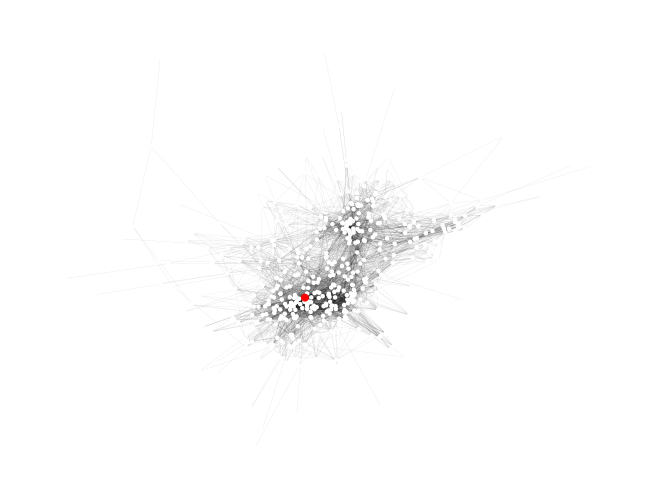

In [306]:
print(len(G)) 
print(len(tar_commu)) 

ccmap = [] 
nsmap = [] 
for i in tar_commu : 
    if i == "4932.YMR190C" : 
        ccmap.append("red") 
        nsmap.append(22) 
    else : 
        ccmap.append("white") 
        nsmap.append(5) 

nx.draw(tar_commu , node_size=nsmap , node_color=ccmap , width=0.022 , edge_color="black") 




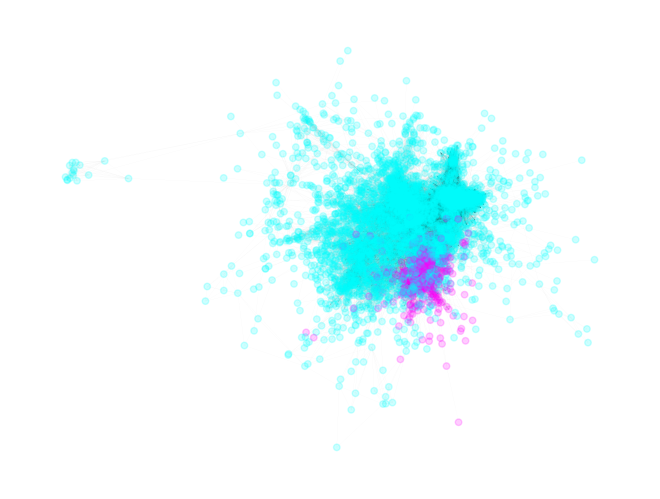

In [388]:
ccmap = [] 
for i in G : 
    if i in tar_commu : 
        ccmap.append("magenta") 
    else : 
        ccmap.append("cyan") 
nx.draw(G , node_color=ccmap , node_size=22 , width=0.022 , alpha=0.2) 

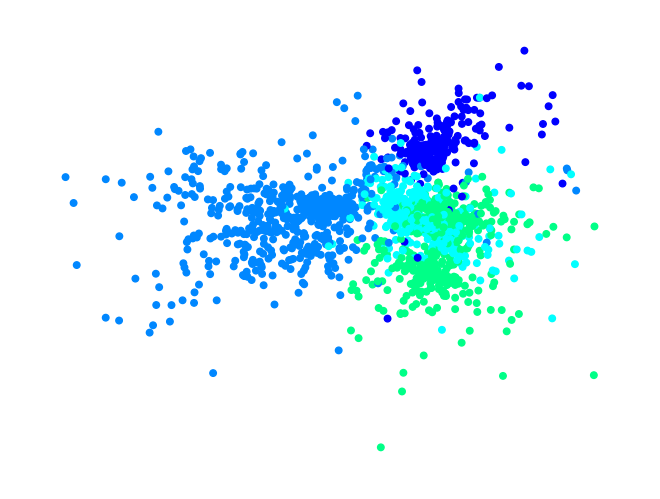

In [391]:
# tmp_c = 0 
raw_commu_box = [] 

for i in newer_commus : 
    if len(i) > 222 : 
        raw_commu_box.append([tmp_c , i]) 
    tmp_c += 1 

box = [] 
for i in raw_commu_box : 
    for ii in i[1] : 
        box.append(ii) 
    
tmp_sG1 = nx.subgraph(G , box)  


ccolours = ["#0000ff" , "#0087ff" , "#00ffff" , "#00ff87" , "#00ff00" , "#87ff00" , "#ffff00" , "#ff8700" , "#ff0000" , "#ff0087" , "#ff00ff" , "#8700ff"] 
ccmap = [] 
for i in tmp_sG1 : 
    if i in raw_commu_box[0][1] : 
        ccmap.append(ccolours[0]) 
    elif i in raw_commu_box[1][1] : 
        ccmap.append(ccolours[1]) 
    elif i in raw_commu_box[2][1] : 
        ccmap.append(ccolours[2]) 
    elif i in raw_commu_box[3][1] : 
        ccmap.append(ccolours[3]) 
    else : 
        print("( O _ O) { ??? )") 
        break 

nx.draw(tmp_sG1 , node_color=ccmap , node_size=22 , width=0.0 , alpha=1) 

In [ ]:
"""
for i in range(len(arr_newer_out)) : 
    if i in newer_out[ii] : 
        if ii < len(ccolours_list) - 1 : 
            colour_map.append(ccolours_list[ii]) 
        else : 
            colour_map.append("#000000") 
""" 



In [ ]:
arr_1 = [] 
for i in new_out : 
    arr_1.append(i) 
    
n_arr = [] 
arr_2 = [] 
for i in arr_1 : 
    if len(i) > 33 : 
        arr_2.append(i) 
#plt.hist(n_arr) 
map_arr = [] 
for i in G0 : 
    if i in arr_2[1] : 
        map_arr.append("red") 
    else : 
        map_arr.append("blue") 
    
largest_cc = max(nx.connected_components(G0) , key=len) 
G0 = G0.subgraph(largest_cc) 

#nx.draw(G0, node_color=map_arr, with_labels=False , node_size=9)

In [ ]:
target_sub = G0.subgraph(arr_2[1]) 
print(len(target_sub)) 
print(len(G0)) 

In [ ]:
print(type([{0, 1, 2}, {3, 4, 5}])) 

In [ ]:
print(type(arr_2)) 
print(type(arr_2[0])) 

print(len(arr_2[0])) 
print(arr_2[0])


In [ ]:
nx.community.modularity(G0 , arr_2) 
